# Compas

“compas_screening_date”: se refiere a la fecha en la que se realizó la evaluación

“decile_score”: es un número, de 1 a 10 que indica el riesgo de reincidencia en general (a mayor riesgo, mayor número).

“v_decile_score”: es un número de 1 a 10, potencialmente distinto del anterior, que indica el riesgo de reincidencia en delitos violentos. Al hacer la evaluación de un caso en COMPAS, se generan las dos puntuaciones (entre otras cosas).

“is_recid”: indicación de si la persona es reincidente (en el tiempo en que se recogen datos: no hay información de si la persona es reincidente más allá de ciertas fechas, y es importante tener esto en cuenta para asegurarse de hacer comparaciones homogéneas).

“r_offense_date”: fecha en la que se cometió el delito por el que se considera reincidente a la persona.

is_violent_recid”: indicación de si la persona es reincidente en un delito con violencia (las mismas consideraciones sobre fechas que para “is_recid” aplican aquí)".

“vr_offense_date”: fecha en la que se cometió el delito violento que da lugar a la consideración de reincidente.

SE PIDE:

1. Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso.
Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.

2. ¿Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS? Si no es así, definir y calcular una feature que sí lo sea.

3. El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante.
Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).

4. El sistema asigna, de media, evaluaciones de riesgo más altas a los hombres que a las mujeres, y a las personas de raza afroamericana que a las de raza caucásica. Sin embargo, también las tasas de reincidencia son más altas para esos colectivos, aunque no está claro que la asignación de riesgo sea “justa” o no.
Mostrar estas diferencias mediante representaciones gráficas y utilizarlas para analizar si la asignación de evaluaciones es justa o no.  

5. ¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva?

## Ejercicio 1

> Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso. Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('compas-scores.csv', index_col='id')
df.head()

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


1.La reincidencia es la tendencia de un individuo que previamente ha cometido un delito a cometer otro delito en el futuro.

2.El objetivo es intentar predecir la probabilidad de que una persona vuelva a reincidir en función de una serie de datos conocidos, con respecto a su edad, sexo, raza...etc.


### Edad, sexo y raza 

Vemos cómo se desglosa el conjunto de datos en edad, sexo y raza.

In [4]:
df.race.value_counts()

African-American    5813
Caucasian           4085
Hispanic            1100
Other                661
Asian                 58
Native American       40
Name: race, dtype: int64

Voy a quedarme con las personas de una determinada raza que tengan una representación importante en número de observaciones. En este caso descartaré Asian y Native American,

Si quiero analizar la probabilidad de reincidencia, el resultado al tener pocas muestras puede ser poco concluyente.

In [5]:
dfsel= df[df['race'].isin(['African-American', 'Caucasian', 'Hispanic', 'Other'])] 
dfsel.head()

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


<AxesSubplot:>

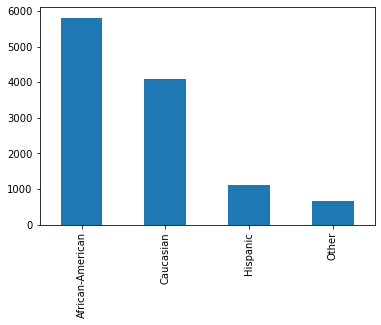

In [6]:
dfsel.race.value_counts().plot(kind='bar')

<AxesSubplot:>

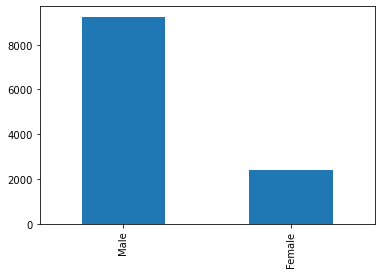

In [7]:
dfsel.sex.value_counts().plot(kind= 'bar')

<AxesSubplot:>

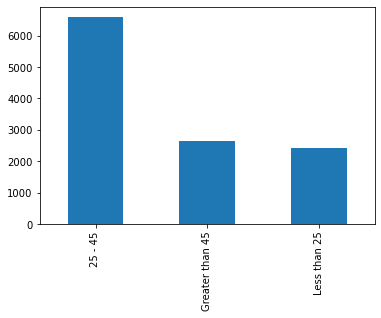

In [8]:
dfsel.age_cat.value_counts().plot(kind= 'bar') # ¿cómo ordenar de menor a mayor edad?

## Reincidencia 
### Ahora analizamos cómo se divide la reincidencia entre los grupos.

In [9]:
dfsel

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,rodrick phillips,rodrick,phillips,2013-02-27,Male,1953-02-24,63,Greater than 45,African-American,0,1,0,0,5,-2.0,2013-02-25 09:20:49,2013-02-26 01:21:51,13003941MM10A,2013-02-25,NaN,2.0,M,Driving Under The Influence,1,NaN,13004477CF10A,M,1.0,2013-03-27,Violation License Restrictions,2013-03-28,2013-05-07,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-02-27,Risk of Recidivism,1,Low,2013-02-27
11753,patrick hamilton,patrick,hamilton,2013-09-22,Male,1968-05-02,47,Greater than 45,Other,0,3,0,0,1,-1.0,2013-09-21 04:06:00,2013-09-22 08:16:13,13013317CF10A,2013-09-21,NaN,1.0,F,Burglary Structure Unoccup,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-09-22,Risk of Recidivism,3,Low,2013-09-22
11754,raymond hernandez,raymond,hernandez,2013-05-17,Male,1993-06-24,22,Less than 25,Caucasian,0,7,3,5,3,-1.0,2013-05-16 08:58:35,2013-05-18 07:59:30,13009569MM10A,2013-05-16,NaN,1.0,M,Battery,1,NaN,14086081TC30A,M,NaN,2014-10-11,Driving License Suspended,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,5,Medium,2013-05-17,Risk of Recidivism,7,Medium,2013-05-17


In [10]:
recid = dfsel.groupby(["age_cat", "sex", "race"])['is_recid'].mean().unstack(level='race')
recid

race                    African-American  Caucasian  Hispanic     Other
age_cat         sex                                                    
25 - 45         Female          0.197368   0.219557  0.082569  0.066667
                Male            0.360354   0.230955  0.151803  0.202749
Greater than 45 Female          0.067114   0.094737  0.069767 -0.129032
                Male            0.236230   0.131063  0.065728  0.105263
Less than 25    Female          0.279152   0.184397  0.162162  0.080000
                Male            0.401372   0.285425  0.339181  0.358491

In [11]:
recid = dfsel.groupby(["age_cat", "sex", "race"])['is_recid'].mean().unstack(level='race')
recid.sum(axis=1)

age_cat          sex   
25 - 45          Female    0.566161
                 Male      0.945861
Greater than 45  Female    0.102586
                 Male      0.538284
Less than 25     Female    0.705711
                 Male      1.384469
dtype: float64

## Puntuaciones de riesgo 
### A cada individuo en el conjunto de datos se le asignó un decile_score rango de 1 a 10.
### Esta puntuación representa el riesgo percibido de reincidencia, siendo 1 el riesgo más bajo y 10 el más alto.

In [12]:
dfsel.decile_score.value_counts()

 1     2546
 2     1556
 3     1245
 4     1193
 5     1028
 6      985
 7      894
 9      800
 8      792
 10     605
-1       15
Name: decile_score, dtype: int64

In [13]:
dfsel[dfsel['decile_score'].isin([-1])] # vemos las personas con valores -1 en decile_score. Los voy a tratar como valores de 1, entendiendo como un error al volcar los datos.

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29,jeremiah joseph,jeremiah,joseph,2014-10-16,Male,1991-08-29,24,Less than 25,African-American,0,-1,0,0,2,0.0,2014-10-16 02:13:30,2014-10-17 03:38:48,14013974CF10A,2014-10-16,NaN,0.0,F,Poss Pyrrolidinovalerophenone,1,NaN,15000162MM30A,M,NaN,2015-01-12,Petit Theft,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2014-10-16,Risk of Recidivism,-1,NaN,2014-10-16
529,karen devonow,karen,devonow,2013-11-25,Female,1955-11-26,60,Greater than 45,Caucasian,0,-1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,-1,NaN,2013-11-25,Risk of Recidivism,-1,NaN,2013-11-25
759,robert cortez,robert,cortez,2013-05-13,Male,1989-03-30,27,25 - 45,Caucasian,0,-1,0,0,1,102.0,2013-08-23 09:11:34,2014-01-07 02:22:59,12000292CF10A,2012-01-06,NaN,493.0,M,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,-1,NaN,2013-05-13,Risk of Recidivism,-1,NaN,2013-05-13
902,michael rohrs,michael,rohrs,2013-04-11,Male,1968-02-06,48,Greater than 45,Caucasian,0,-1,0,0,3,-1.0,2013-04-10 05:39:46,2013-04-12 09:08:49,13005170CF10A,2013-04-10,NaN,1.0,F,Possession of Cocaine,1,NaN,14003620CF10A,F,0.0,2014-03-14,Traffick Methampheta 28g><200g,2014-03-14,2014-04-21,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-11,Risk of Recidivism,-1,NaN,2013-04-11
3028,deborah conroy,deborah,conroy,2013-05-07,Female,1962-09-05,53,Greater than 45,Caucasian,0,-1,0,0,0,0.0,2013-05-07 02:21:39,2013-05-07 07:20:14,13008854MM10A,2013-05-06,NaN,1.0,M,DUI Property Damage/Injury,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,-1,NaN,2013-05-07,Risk of Recidivism,-1,NaN,2013-05-07
3708,katt mcnish,katt,mcnish,2013-05-12,Female,1976-05-14,39,25 - 45,Caucasian,0,-1,0,0,0,-1.0,2013-05-11 05:10:47,2013-05-12 05:55:20,13009096MM10A,2013-05-11,NaN,1.0,M,Driving Under The Influence,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-05-12,Risk of Recidivism,-1,NaN,2013-05-12
4995,raymond manganiotis,raymond,manganiotis,2013-06-21,Male,1963-01-25,53,Greater than 45,Caucasian,0,-1,0,0,3,-10.0,2013-06-11 02:07:31,2013-06-21 05:30:17,13008275CF10A,2013-06-10,NaN,11.0,F,Possession of Cocaine,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,4,Low,2013-06-21,Risk of Recidivism,-1,NaN,2013-06-21
6283,carla silva,carla,silva,2013-09-23,Female,1954-03-01,62,Greater than 45,Other,0,-1,0,0,1,-2.0,2013-09-21 10:16:36,2013-09-22 01:50:26,13013329CF10A,2013-09-21,NaN,2.0,F,Possession of Cocaine,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-09-23,Risk of Recidivism,-1,NaN,2013-09-23
7132,clee farr,clee,farr,2013-02-08,Male,1955-12-22,60,Greater than 45,Caucasian,0,-1,0,0,0,-1.0,2013-02-07 09:00:40,2013-02-08 08:10:45,13001918CF10A,2013-02-07,NaN,1.0,F,Manufacture Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,5,Medium,2013-02-08,Risk of Recidivism,-1,NaN,2013-02-08


In [14]:
dfsel['decile_score'].replace({-1:1}, inplace= True)

C:\Users\apoga\Anaconda3\envs\Neuronal\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
dfsel.decile_score.value_counts()

1     2561
2     1556
3     1245
4     1193
5     1028
6      985
7      894
9      800
8      792
10     605
Name: decile_score, dtype: int64

<AxesSubplot:>

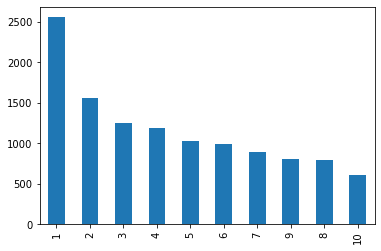

In [16]:
dfsel.decile_score.value_counts().plot(kind='bar')

In [17]:
dfdecile=dfsel.groupby(['race', 'decile_score']).name.count().reset_index() # Agrupo por raza y decile_score para ver de cada raza qué puntuación le asignan del 1 al 10.
dfdecile

,race,decile_score,name
0,African-American,1,700
1,African-American,2,623
2,African-American,3,573
3,African-American,4,589
4,African-American,5,525
5,African-American,6,585
6,African-American,7,595
7,African-American,8,566
8,African-American,9,587
9,African-American,10,470


In [18]:
dfres = dfdecile.pivot(columns= 'decile_score', index= 'race', values= 'name') 

In [19]:
dfres

decile_score,1,2,3,4,5,6,7,8,9,10
race,,,,,,,,,,
African-American,700,623,573,589,525,585,595,566,587,470
Caucasian,1200,610,480,450,380,301,228,179,166,91
Hispanic,376,203,135,84,85,64,50,34,37,32
Other,285,120,57,70,38,35,21,13,10,12


In [20]:
dfres = dfres.melt(ignore_index= False)

In [21]:
dfres.keys()

Index(['decile_score', 'value'], dtype='object')

In [22]:
dfres.index

Index(['African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other',
       'African-American', 'Caucasian', 'Hispanic', 'Other'],
      dtype='object', name='race')

In [23]:
dfres

,decile_score,value
race,,
African-American,1,700
Caucasian,1,1200
Hispanic,1,376
Other,1,285
African-American,2,623
Caucasian,2,610
Hispanic,2,203
Other,2,120
African-American,3,573


In [24]:
dfres = dfres.reset_index()

In [25]:
dfres.head()

,race,decile_score,value
0,African-American,1,700
1,Caucasian,1,1200
2,Hispanic,1,376
3,Other,1,285
4,African-American,2,623


In [26]:
dfres['media']= dfres.groupby('race').value.apply(lambda x: x/x.sum())

In [27]:
dfres.groupby('race').media.sum()

race
African-American    1.0
Caucasian           1.0
Hispanic            1.0
Other               1.0
Name: media, dtype: float64

In [28]:
# Lo representamos graficamente y representamos los gráficos en función del número de observaciones de cada raza, para que visualmente sea comparable.

In [29]:
import seaborn as sns

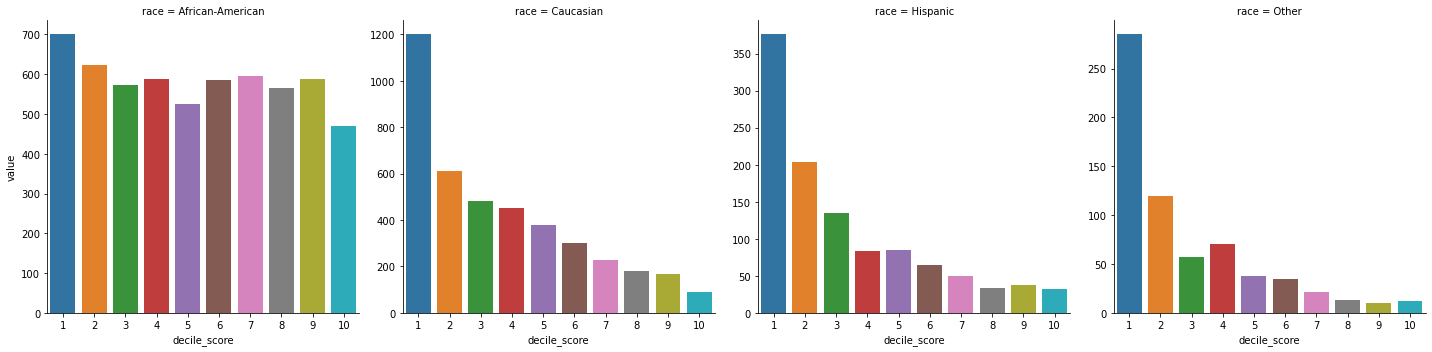

In [30]:
sns.catplot(x='decile_score', y='value', col= 'race', data= dfres, kind='bar', sharey=False)

## Ejercicio 2

> ¿Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS? Si no es así, definir y calcular una feature que sí lo sea.

### Aplico pd.get_dummies para convertir a numéricas las variables raza y sexo, ya que las voy a incluir para realizar el modelo.

In [89]:
dfsel=pd.get_dummies(data=dfsel, columns= ['sex'], drop_first=True)

In [91]:
dfsel=pd.get_dummies(data=dfsel, columns= ['race'])

In [32]:
dfsel[['is_recid', 'is_violent_recid']]

,is_recid,is_violent_recid
id,,
1,0,0
2,-1,0
3,1,1
4,1,0
5,0,0
...,...,...
11752,1,0
11753,0,0
11754,1,0


tabla de contigencia

### 1. Estudio la variable objetivo 'Is recid'

In [92]:
dfsel.head()

,name,first,last,compas_screening_date,dob,age,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date,Medidas_prev,sex_Male,race_African-American,race_Caucasian,race_Hispanic,race_Other
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,1947-04-18,69,Greater than 45,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14,negativo,1,0,0,0,1
2,michael ryan,michael,ryan,2014-12-31,1985-02-06,31,25 - 45,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31,negativo,1,0,1,0,0
3,kevon dixon,kevon,dixon,2013-01-27,1982-01-22,34,25 - 45,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27,negativo,1,1,0,0,0
4,ed philo,ed,philo,2013-04-14,1991-05-14,24,Less than 25,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14,negativo,1,1,0,0,0
5,marcu brown,marcu,brown,2013-01-13,1993-01-21,23,Less than 25,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13,positivo,1,1,0,0,0


In [94]:
# Elijo las variables explicativas (X) y la variable onjetivo (y) para 'is recid'

X = dfsel[['juv_fel_count', 'age', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'sex_Male', 'race_African-American', 'race_Caucasian', 'race_Hispanic', 'race_Other']]
y = dfsel['is_recid']

In [95]:
dfsel['is_recid'].replace({-1:1}, inplace= True) # veo las personas con valores -1 en is_recid. Los voy a tratar como valores de 1, entendiendo como un error al volcar los datos.

In [96]:
# preproceso de datos con X_train Y_train

from sklearn.model_selection import train_test_split

In [97]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X.values, y.values, test_size=0.33, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression # elijo el modelo Logistic Regression.

In [99]:
model= LogisticRegression()

In [100]:
model.fit(X,y)

C:\Users\apoga\Anaconda3\envs\Neuronal\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_pred = model.predict(X_test)

In [102]:
from sklearn.metrics import plot_confusion_matrix, classification_report

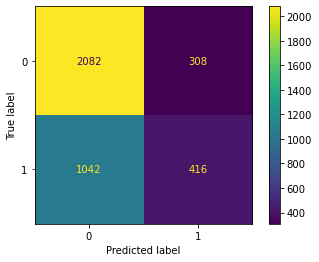

In [103]:
plot_confusion_matrix(estimator=model, X=X_test, y_true= y_test)

In [104]:
reportlr = classification_report(y_true=y_test, y_pred = model.predict(X_test))

In [105]:
print(reportlr)

              precision    recall  f1-score   support

           0       0.67      0.87      0.76      2390
           1       0.57      0.29      0.38      1458

    accuracy                           0.65      3848
   macro avg       0.62      0.58      0.57      3848
weighted avg       0.63      0.65      0.61      3848



### como hay un % sustancialmente menor de is recid 1 con respecto al 0, debemos balancear los datos. Aplico SMOTE

In [106]:
dfsel.is_recid.value_counts(normalize=True)

0    0.623553
1    0.376447
Name: is_recid, dtype: float64

In [107]:
dfsel.is_recid.value_counts(normalize=True)

0    0.623553
1    0.376447
Name: is_recid, dtype: float64

In [108]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [109]:
X_train.shape

(7811, 11)

In [110]:
X_sm.shape

(14540, 11)

In [111]:
y_sm.value_counts(normalize= True)*100

0    50.0
1    50.0
Name: is_recid, dtype: float64

### Lo aplico de nuevo al modelo LogisticRegression

In [112]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X_sm, y_sm, test_size=0.33, random_state=42)  

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
modelsm= LogisticRegression()

In [115]:
modelsm.fit(X_train, y_train)

C:\Users\apoga\Anaconda3\envs\Neuronal\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
y_pred = modelsm.predict(X_test)

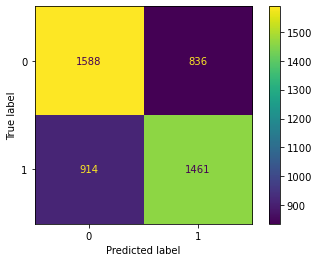

In [117]:
plot_confusion_matrix(estimator=modelsm, X=X_test, y_true= y_test)

In [118]:
reportlrsm = classification_report(y_true=y_test, y_pred = modelsm.predict(X_test))

In [119]:
print(reportlrsm)

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      2424
           1       0.64      0.62      0.63      2375

    accuracy                           0.64      4799
   macro avg       0.64      0.64      0.64      4799
weighted avg       0.64      0.64      0.64      4799



### 2. Estudio la variable objetivo 'is violent recid'

In [120]:
# Elijo las variables explicativas (X) y la variable objetivo (y) ahora para 'is violent recid'

X = dfsel[['juv_fel_count', 'age', 'v_decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'sex_Male', 'race_African-American', 'race_Caucasian', 'race_Hispanic', 'race_Other']]
y = dfsel['is_violent_recid']

In [121]:
# preproceso de datos con X_train Y_train

from sklearn.model_selection import train_test_split

In [122]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X.values, y.values, test_size=0.33, random_state=42)

In [123]:
from sklearn.linear_model import LogisticRegression # elijo el modelo Logistic Regression.

In [124]:
model= LogisticRegression()

In [125]:
model.fit(X,y)

C:\Users\apoga\Anaconda3\envs\Neuronal\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
y_pred = model.predict(X_test)

In [127]:
from sklearn.metrics import plot_confusion_matrix, classification_report

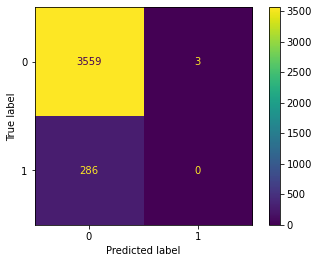

In [128]:
plot_confusion_matrix(estimator=model, X=X_test, y_true= y_test)

In [129]:
reportlr = classification_report(y_true=y_test, y_pred = model.predict(X_test))

In [130]:
print(reportlr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3562
           1       0.00      0.00      0.00       286

    accuracy                           0.92      3848
   macro avg       0.46      0.50      0.48      3848
weighted avg       0.86      0.92      0.89      3848



### como hay muy pocos valores de violent recid 1 con respecto al 0, debemos balancear los datos. Aplico SMOTE

In [131]:
dfsel.is_violent_recid.value_counts(normalize=True)

0    0.925208
1    0.074792
Name: is_violent_recid, dtype: float64

In [132]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [133]:
X_train.shape # número de muestras de X_train

(7811, 11)

In [134]:
X_sm.shape # número de muestras de X_sm (aplicado SMOTE)

(21574, 11)

In [135]:
y_sm.value_counts(normalize= True)*100 # vemos como el porcentaje está equilibrado

0    50.0
1    50.0
Name: is_violent_recid, dtype: float64

In [136]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X_sm, y_sm, test_size=0.33, random_state=42)      # Ahora aplico train, test, split con X_sm e y_sm( SMOTE aplicado)

### Lo aplico de nuevo al modelo LogisticRegression

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
modelsm= LogisticRegression()

In [139]:
modelsm.fit(X_train, y_train)

C:\Users\apoga\Anaconda3\envs\Neuronal\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
y_pred = modelsm.predict(X_test)

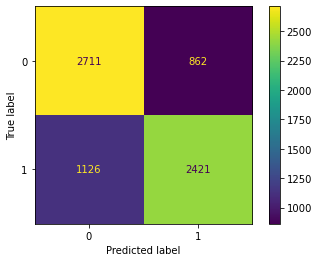

In [141]:
plot_confusion_matrix(estimator=modelsm, X=X_test, y_true= y_test)

In [142]:
reportlrsm = classification_report(y_true=y_test, y_pred = modelsm.predict(X_test))

In [143]:
print(reportlrsm)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      3573
           1       0.74      0.68      0.71      3547

    accuracy                           0.72      7120
   macro avg       0.72      0.72      0.72      7120
weighted avg       0.72      0.72      0.72      7120



ver las diferencias de las medias en los que son reincidentes de lo que no son

## Ejercicio 3

> El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante. Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).

In [84]:
dfsel['decile_score'] >= 7

id
1        False
2        False
3        False
4        False
5         True
         ...  
11752    False
11753    False
11754     True
11755    False
11756    False
Name: decile_score, Length: 11659, dtype: bool

In [85]:
import numpy as np

In [147]:
dfsel['Medidas_prev'] = np.where(dfsel['decile_score'] >= 7, 'positivo', 'negativo') # positivo los casos en los que la puntuación de 'decile_score' sea >=7. Si no, negativo

In [220]:
dfsel=pd.get_dummies(dfsel, columns=['Medidas_prev'], drop_first=True)  # Cambio los valores de positivo por 1 y de negativo por 0, para poder realizar la comparativa.

In [221]:
dfsel.head()

,name,first,last,compas_screening_date,dob,age,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date,sex_Male,race_African-American,race_Caucasian,race_Hispanic,race_Other,Medidas_prev_1
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,1947-04-18,69,Greater than 45,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14,1,0,0,0,1,0
2,michael ryan,michael,ryan,2014-12-31,1985-02-06,31,25 - 45,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31,1,0,1,0,0,0
3,kevon dixon,kevon,dixon,2013-01-27,1982-01-22,34,25 - 45,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27,1,1,0,0,0,0
4,ed philo,ed,philo,2013-04-14,1991-05-14,24,Less than 25,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14,1,1,0,0,0,0
5,marcu brown,marcu,brown,2013-01-13,1993-01-21,23,Less than 25,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13,1,1,0,0,0,1


In [247]:
# Elijo las variables explicativas (X) y la variable objetivo (y)

X = dfsel[['juv_fel_count','is_recid', 'age', 'juv_misd_count', 'juv_other_count', 'priors_count', 'sex_Male', 'race_African-American', 'race_Caucasian', 'race_Hispanic', 'race_Other']]
y = dfsel['Medidas_prev_1']

In [248]:
# preproceso de datos con X_train Y_train

from sklearn.model_selection import train_test_split

In [249]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X.values, y.values, test_size=0.33, random_state=42)

In [250]:
from sklearn.linear_model import LogisticRegression # elijo el modelo Logistic Regression.

In [251]:
model= LogisticRegression()

In [252]:
model.fit(X,y)

LogisticRegression()

In [253]:
y_pred = model.predict(X_test)

In [254]:
from sklearn.metrics import plot_confusion_matrix, classification_report

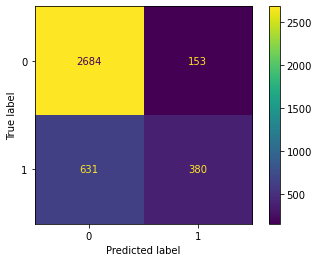

In [255]:
plot_confusion_matrix(estimator=model, X=X_test, y_true= y_test)

In [256]:
reportlr = classification_report(y_true=y_test, y_pred = model.predict(X_test))

In [257]:
print(reportlr)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2837
           1       0.71      0.38      0.49      1011

    accuracy                           0.80      3848
   macro avg       0.76      0.66      0.68      3848
weighted avg       0.78      0.80      0.77      3848



In [88]:
from sklearn.metrics import 

SyntaxError: invalid syntax (Temp/ipykernel_8772/2899723155.py, line 1)

## Ejercicio 4

El sistema asigna, de media, evaluaciones de riesgo más altas a los hombres que a las mujeres, y a las personas de raza afroamericana que a las de raza caucásica. Sin embargo, también las tasas de reincidencia son más altas para esos colectivos, aunque no está claro que la asignación de riesgo sea “justa” o no. Mostrar estas diferencias mediante representaciones gráficas y utilizarlas para analizar si la asignación de evaluaciones es justa o no.